In [1]:
import pandas as pd
import numpy as np
import os
np.random.seed(42)
%load_ext autoreload
%autoreload 2

# === Paths ===
path_in = os.path.join("../Data")  # parent directory

###################### ======================== Case Study 2 ======================= ###########################

file_path = os.path.join(path_in, "dataset4.xlsx")
cs2 = pd.read_excel(file_path)
# Rename columns
rename_mapping = {
        'T_ext': 'OUTDOOR_TEMP',
        'heating_total [kW]': 'PHI_H',
        'GHI': 'PYRANOMETER',
        'T_int': 'INDOOR_TEMP'
    }
cs2 = cs2.rename(columns=rename_mapping)
cs2['PHI_H']=cs2['PHI_H']*1000
# Convert 't' to datetime and set as index

cs2['Time'] = pd.to_datetime(cs2['Time'])
cs2 = cs2.set_index('Time')
cs2 = cs2.resample("30min").mean()
cs2_surface_area = 2100  # m² 
# cs2 = cs2.iloc[0:720]

# split_index = int(0.8 * len(cs2))
# end_index = int(len(cs2)) 
# train_cs2 = cs2.iloc[:split_index]
# val_cs2 = cs2.iloc[split_index:end_index]



 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.8810
Trial RMSE Training: 0.4312
Trial initialization: {'R_int_in': 0.4412721887521221, 'R_in_e': 0.12379415837508927, 'R_e_a': 0.49618655629104763, 'R_in_a': 0.036319744072987964, 'C_int': 4546710825.911416, 'C_in': 1294789372.0221646, 'C_e': 3313016395.028685, 'Aint': 196.3780467652213, 'Ain': 327.6429013352187, 'Ae': 344.4275213152382, 'fh_int': 0.18485445552552704, 'fh_in': 0.9695846277645586, 'fh_e': 0.7751328233611146}
Trial parameters: {'R_int_in': 0.003930379875991257, 'R_in_e': 0.0019999901211658526, 'R_e_a': 0.001999998660491509, 'R_in_a': 0.006300503513655552, 'C_int': 4575888935.631608, 'C_in': 67787415.38064808, 'C_e': 3759862829.1438293, 'Aint': 0.00013677885031096262, 'Ain': 21.74734228517839, 'Ae': 0.00012085412113544543, 'fh_int': 0.9722452434022052, 'fh_in': 0.02775436058511369, 'fh_e': 3.9601268118020837e-07, 'Objective': 0.4312156353599237, 'Solve_time': 156.30940294265747}
Solve Time: 156.30940294265747



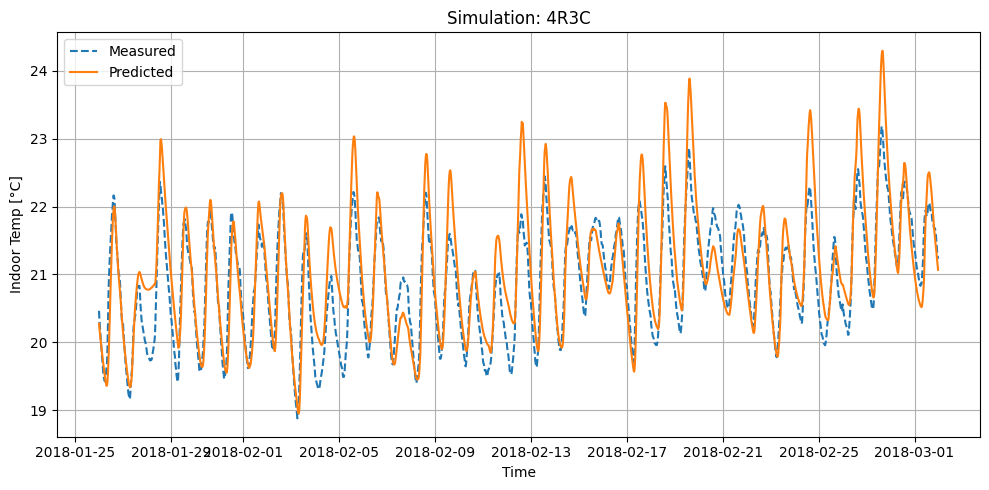

In [4]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:1200]
val_cs2 = cs2.iloc[1200:1200+720]
test_cs2= cs2.iloc[1200:]
# --- Bounds ---

bounds_cs2 = {
    "R_int_in": (0.002, 1),
    "R_in_e": (0.002, 1),
    "R_e_a": (0.002, 1),
    "R_in_a": (0.002, 1),
    "C_int": (1.2e6, 5e9),
    "C_in": (1.2e6, 5e9),
    "C_e": (1.2e6, 5e9),
    "Aint": (0.0001, 0.3 * cs2_surface_area),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh_int": (0,1),
    "fh_in": (0,1),
    "fh_e": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="4R3C", bounds=bounds_cs2, num_trials=3)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model.T_int[last_index](), "Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="4R3C",
        initializations=initialize_validation,
        show_plot=True
    )

20 days Validation RMSE: 0.4759


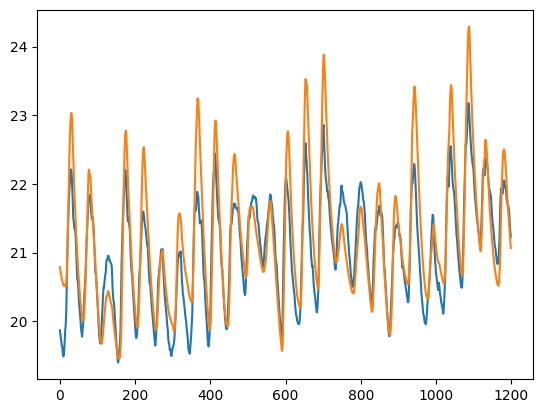

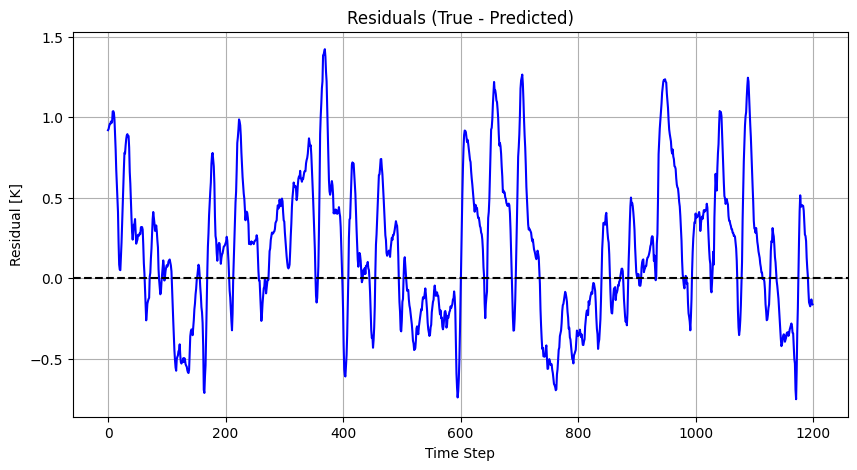

In [5]:
t_single_train_prediction=t_true[480:]
t_single_train_actual=t_pred[480:]

testing_rmse = np.sqrt(mean_squared_error(t_single_train_actual, t_single_train_prediction))
print(f"20 days Validation RMSE: {testing_rmse:.4f}")

plt.plot(t_single_train_prediction)
plt.plot(t_single_train_actual)

# --- Plot Residuals ---
plot_residual(t_pred=t_single_train_prediction, t_true=t_single_train_actual)

## Train every 5 days
### Total 4 training will be made during the 20days testing dataset.

### 1) The first 5 days forecasting


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.6764
Trial RMSE Training: 0.5407
Trial initialization: {'R_in_e': 0.006516595006478797, 'R_e_a': 0.8156459670263794, 'R_in_a': 0.7071504865037695, 'C_in': 364774576.8524527, 'C_e': 385863902.9962869, 'Ain': 46.64822318801176, 'Ae': 225.8334731363189, 'fh': 0.11586905952512971}
Trial parameters: {'R_in_e': 0.9997273203850031, 'R_e_a': 0.005849314567990401, 'R_in_a': 0.0013544800374135405, 'C_in': 499954239.4693992, 'C_e': 499983168.49005055, 'Ain': 122.82567326194848, 'Ae': 0.002327304838895592, 'fh': 0.19817441311644407, 'Objective': 0.5406988048126046, 'Solve_time': 39.80675196647644}
Solve Time: 39.80675196647644

=== Best result ===
Best Trial Validation #: 1
Best Trial Training #: 1
Best RMSE Validation: 0.6764
Best RMSE Training: 0.5407
Best initialization Validation: {'R_in_e': 0.006516595006478797, 'R_e_a': 0.8156459670263794, 'R_in_a': 0.7071504865037695, 'C_in': 364774576.8524527, 'C_e': 385863902.9962869, 'Ain': 46.

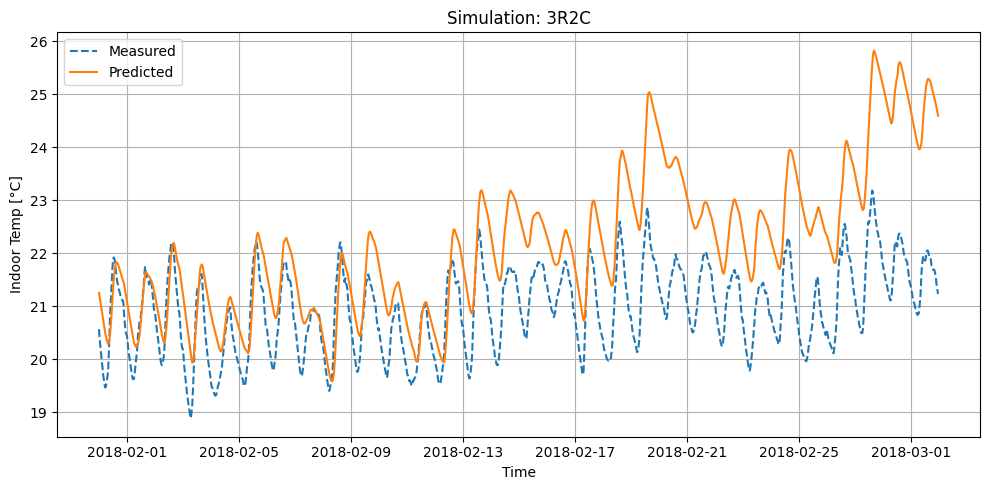

In [31]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:1440]
val_cs2 = cs2.iloc[1440:1920]
test_cs2= cs2.iloc[1440:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="3R2C", bounds=bounds_cs2, num_trials=1)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=True
    )


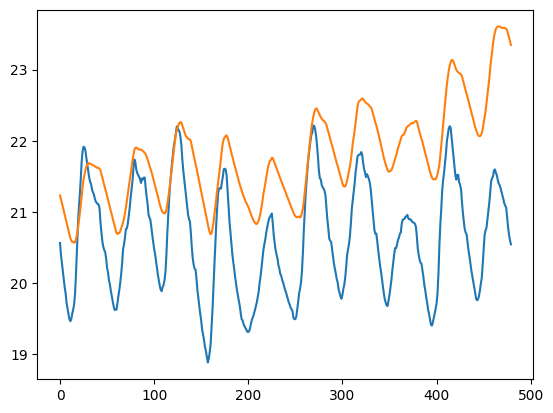

In [8]:
plt.plot(t_true[0:480])
plt.plot(t_pred[0:480])

20 days Validation RMSE: 2.6692


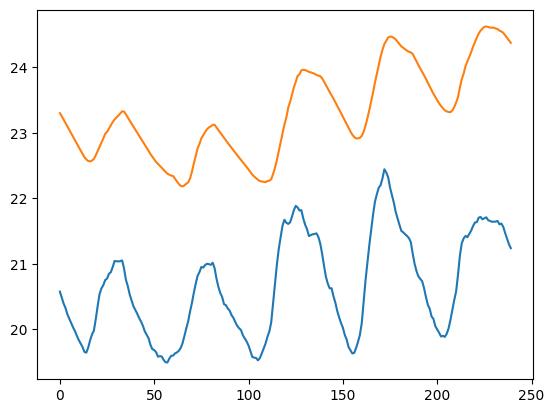

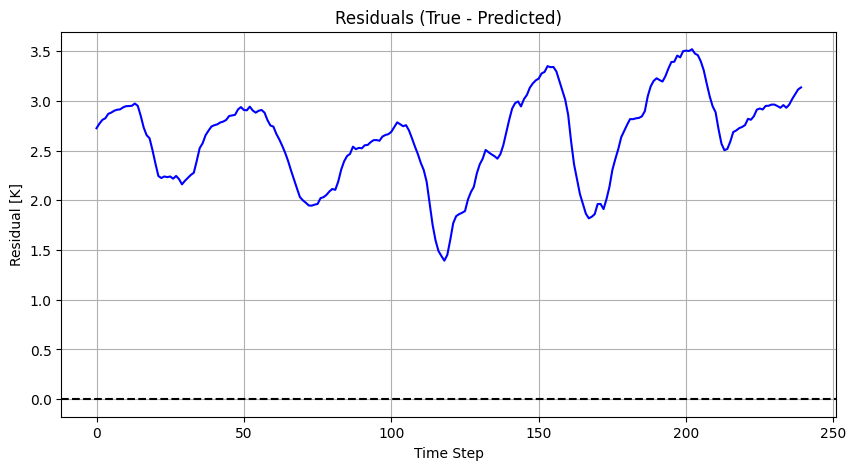

In [5]:
t_5days_train_prediction_1=t_true[480:480+240]
t_5days_train_actual_1=t_pred[480:480+240]

testing_rmse = np.sqrt(mean_squared_error(t_5days_train_actual_1, t_5days_train_prediction_1))
print(f"20 days Validation RMSE: {testing_rmse:.4f}")

plt.plot(t_5days_train_prediction_1)
plt.plot(t_5days_train_actual_1)

# --- Plot Residuals ---
plot_residual(t_pred=t_5days_train_prediction_1, t_true=t_5days_train_actual_1)

five last days Validation RMSE: 0.9908


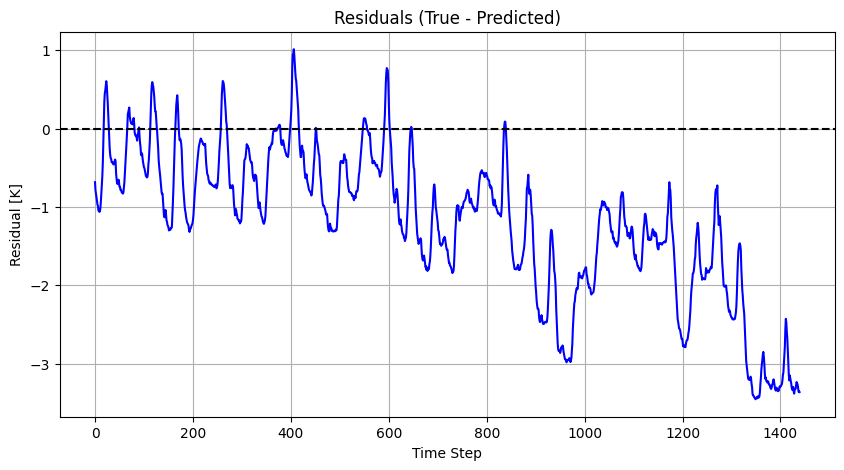

In [ ]:
testing_rmse = np.sqrt(mean_squared_error(t_true[480:480+240], t_pred[480:480+240]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)



### 2) The second 5 days forecasting


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 1.3737
Trial RMSE Training: 0.7070
Trial initialization: {'R_in_e': 0.12291619660993405, 'R_e_a': 0.49568173320115894, 'R_in_a': 0.03535413259410318, 'C_in': 454750880.63731223, 'C_e': 130131210.81840844, 'Ain': 417.3890728907802, 'Ae': 196.3780467652213, 'fh': 0.5200680211778108}
Trial parameters: {'R_in_e': 0.9999996189148675, 'R_e_a': 0.9999954094772288, 'R_in_a': 0.002344900570726712, 'C_in': 499999857.6827972, 'C_e': 499999824.3405698, 'Ain': 43.05668714781278, 'Ae': 0.0002801236470905025, 'fh': 0.32808072201502164, 'Objective': 0.7069622290078201, 'Solve_time': 59.71876406669617}
Solve Time: 59.71876406669617

=== Best result ===
Best Trial Validation #: 1
Best Trial Training #: 1
Best RMSE Validation: 1.3737
Best RMSE Training: 0.7070
Best initialization Validation: {'R_in_e': 0.12291619660993405, 'R_e_a': 0.49568173320115894, 'R_in_a': 0.03535413259410318, 'C_in': 454750880.63731223, 'C_e': 130131210.81840844, 'Ain': 41

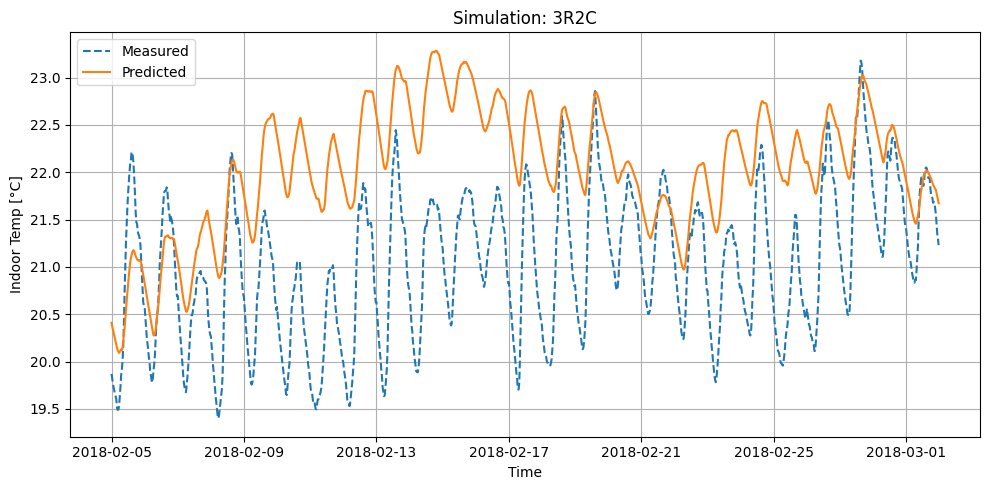

In [16]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[240:1440+240]
val_cs2 = cs2.iloc[1440+240:1920+240]
test_cs2= cs2.iloc[1440+240:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="3R2C", bounds=bounds_cs2, num_trials=1)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=True
    )


five last days Validation RMSE: 1.4334


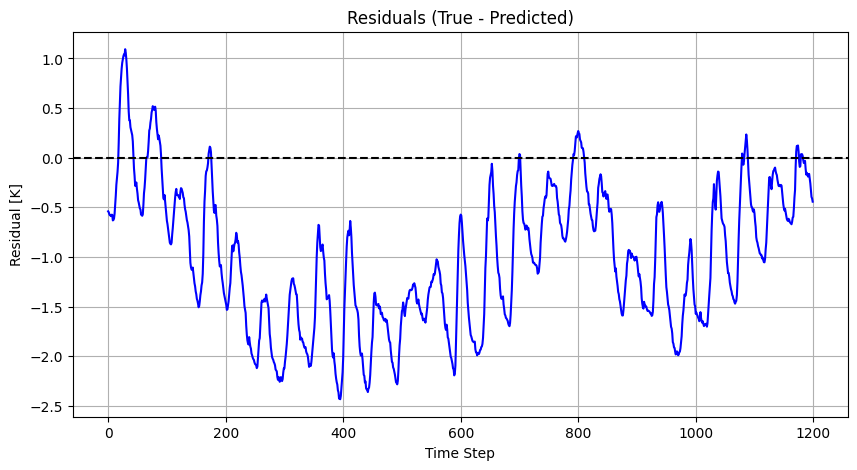

In [19]:
testing_rmse = np.sqrt(mean_squared_error(t_true[480:480+240], t_pred[480:480+240]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

### 3) The third 5 days forecasting


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.8840
Trial RMSE Training: 0.5103
Trial initialization: {'R_in_e': 0.5471635690639364, 'R_e_a': 0.18566960107000152, 'R_in_a': 0.969615043136794, 'C_in': 387791278.85719615, 'C_e': 469809971.8405304, 'Ain': 563.7412412866837, 'Ae': 376.67702686098573, 'fh': 0.9218742350231168}
Trial parameters: {'R_in_e': 0.9999767375712104, 'R_e_a': 0.004824569673102809, 'R_in_a': 0.0014501080485088962, 'C_in': 499992182.3695782, 'C_e': 499993114.3893569, 'Ain': 105.52789697718381, 'Ae': 0.0017806830821557554, 'fh': 0.22459625004924624, 'Objective': 0.5103223048616402, 'Solve_time': 46.15537714958191}
Solve Time: 46.15537714958191

=== Best result ===
Best Trial Validation #: 1
Best Trial Training #: 1
Best RMSE Validation: 0.8840
Best RMSE Training: 0.5103
Best initialization Validation: {'R_in_e': 0.5471635690639364, 'R_e_a': 0.18566960107000152, 'R_in_a': 0.969615043136794, 'C_in': 387791278.85719615, 'C_e': 469809971.8405304, 'Ain': 563.7

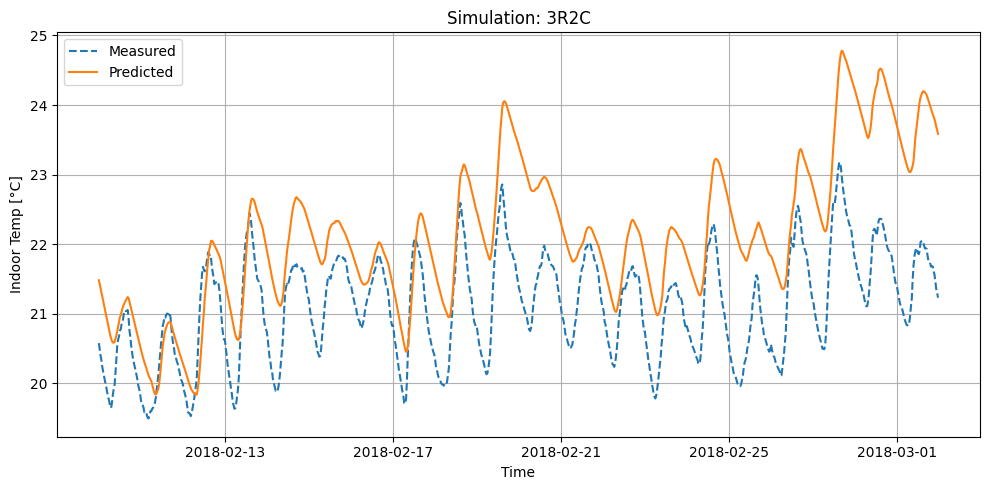

In [20]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[240+240:1440+240+240]
val_cs2 = cs2.iloc[1440+240+240:1920+240+240]
test_cs2= cs2.iloc[1440+240+240:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="3R2C", bounds=bounds_cs2, num_trials=1)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=True
    )


five last days Validation RMSE: 1.0789


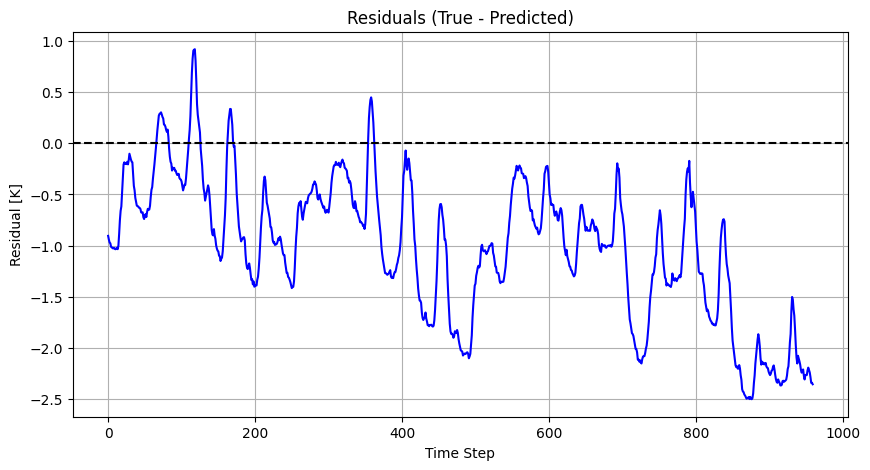

In [22]:
testing_rmse = np.sqrt(mean_squared_error(t_true[480:480+240], t_pred[480:480+240]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

### 4) The last 5 days forecasting


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.7604
Trial RMSE Training: 0.5197
Trial initialization: {'R_in_e': 0.08940400954986757, 'R_e_a': 0.19678687955672605, 'R_in_a': 0.04618206162162753, 'C_in': 163339835.0508689, 'C_e': 194949967.55505154, 'Ain': 170.94996288265125, 'Ae': 522.1046478919645, 'fh': 0.3567533266935893}
Trial parameters: {'R_in_e': 0.9999945785898221, 'R_e_a': 0.005004596646009713, 'R_in_a': 0.0016237424871956502, 'C_in': 499997895.7821725, 'C_e': 499997931.68468606, 'Ain': 93.86024362691946, 'Ae': 0.0009465894695220895, 'fh': 0.18210377778458364, 'Objective': 0.5197089464880882, 'Solve_time': 44.87414789199829}
Solve Time: 44.87414789199829

=== Best result ===
Best Trial Validation #: 1
Best Trial Training #: 1
Best RMSE Validation: 0.7604
Best RMSE Training: 0.5197
Best initialization Validation: {'R_in_e': 0.08940400954986757, 'R_e_a': 0.19678687955672605, 'R_in_a': 0.04618206162162753, 'C_in': 163339835.0508689, 'C_e': 194949967.55505154, 'Ain':

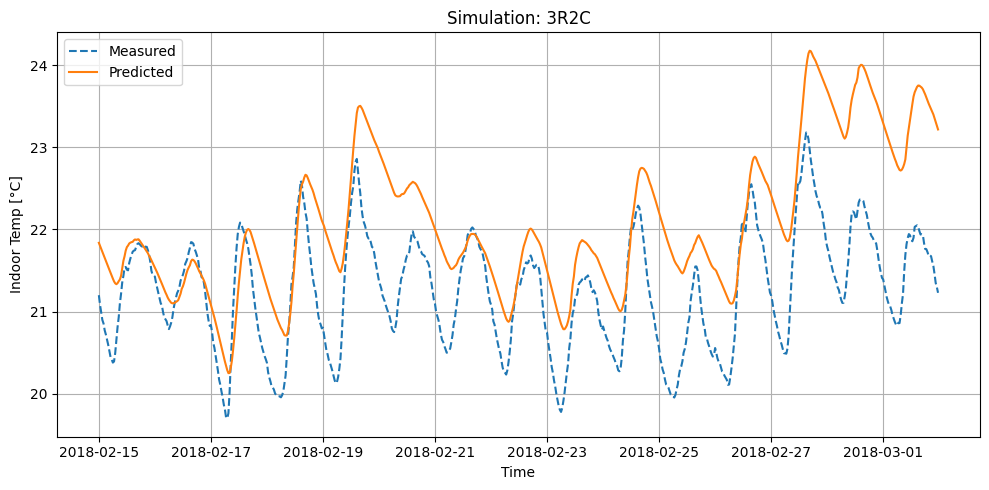

In [23]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[240+240+240:1440+240+240+240]
val_cs2 = cs2.iloc[1440+240+240+240:1920+240+240+240]
test_cs2= cs2.iloc[1440+240+240+240:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="3R2C", bounds=bounds_cs2, num_trials=1)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="3R2C",
        initializations=initialize_validation,
        show_plot=True
    )


five last days Validation RMSE: 1.4216


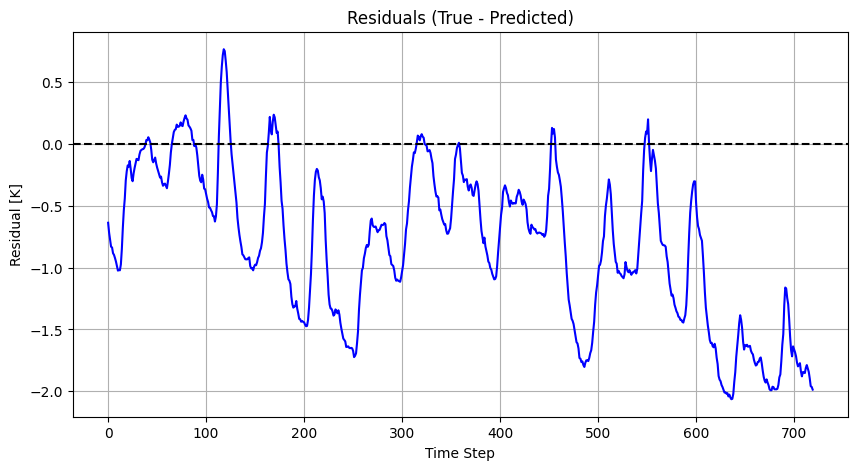

In [25]:
testing_rmse = np.sqrt(mean_squared_error(t_true[480:480+240], t_pred[480:480+240]))
print(f"five last days Validation RMSE: {testing_rmse:.4f}")

# --- Plot Residuals ---
plot_residual(t_pred=t_pred, t_true=t_true)

best_obj = all_trials['Objective'].min()
mean_obj = all_trials["Objective"].mean()
std_obj = all_trials["Objective"].std()
matches = (np.round(all_trials['Objective'], 5) == np.round(best_obj, 5))
n_matches = matches.sum()
n_total = len(all_trials)
success_rate = 100 * n_matches / n_total

# The same analysis for 4R3C

In [ ]:
from models import *  
from train import *  
import numpy as np
from simulate import *
from plot import *

train_cs2 = cs2.iloc[:1440]
val_cs2 = cs2.iloc[1440:1440+480]
test_cs2= cs2.iloc[1440:]
# --- Bounds ---

bounds_cs2 = {
    "R_in_e": (0.001, 1),
    "R_e_a": (0.001, 1),
    "R_in_a": (0.001, 1),
    "C_in": (1e6, 5e8),
    "C_e": (1e6, 5e8),
    "Ain": (0.0001, 0.3 * cs2_surface_area),
    "Ae": (0.0001, 0.3 * cs2_surface_area),
    "fh": (0,1)
}

model, parameters, best_initialization, all_trials = train_greybox_model_with_validation_process(train_df=train_cs2, val_df=val_cs2,model_type="4R3C", bounds=bounds_cs2, num_trials=1)

last_index = max(model.T_in.index_set())
# --- Validation Initialization (from last training value) ---
initialize_validation = {"Tint": model.T_int[last_index](), "Tin": model.T_in[last_index](), "Te": model.T_e[last_index]()}

# --- Run Simulation and Validation ---
validation, t_pred, t_true = simulate_and_evaluate(
        val_df=test_cs2,
        param_dict=parameters,
        model_type="4R3C",
        initializations=initialize_validation,
        show_plot=True
    )


 === Trial Result
Trial index #: 0
Trial RMSE Validation: 0.3484
Trial RMSE Training: 0.3245
Trial initialization: {'R_in_e': 0.6015138967314656, 'R_e_a': 0.7083645052182495, 'R_in_a': 0.021563909801506645, 'C_in': 484985016.22883517, 'C_e': 416388877.75941044, 'Ain': 133.77371849340292, 'Ae': 114.54981115797668, 'fh': 0.18340450985343382}
Trial parameters: {'R_int_in': 0.016526755198179484, 'R_in_e': 0.9916398635058796, 'R_e_a': 0.0021281309353328166, 'R_in_a': 0.19025917029962944, 'C_int': 5012645.316083728, 'C_in': 1181482.0543231154, 'C_e': 499998928.38495994, 'Aint': 0.19261578869468846, 'Ain': 0.5215555649921513, 'Ae': 0.00022755078693675727, 'fh_int': -9.79689166699343e-09, 'fh_in': 0.0010126221788266411, 'fh_e': 0.9989873876180652, 'fh': 0.18340450985343382, 'Objective': 0.3244553948998287, 'Solve_time': 590.4030442237854}
Solve Time: 590.4030442237854

=== Best result ===
Best Trial Validation #: 1
Best Trial Training #: 1
Best RMSE Validation: 0.3484
Best RMSE Training: 0.32

NameError: name 'test_cs2' is not defined

In [8]:
len(t_true)

1440

20 days Validation RMSE: 1.0203


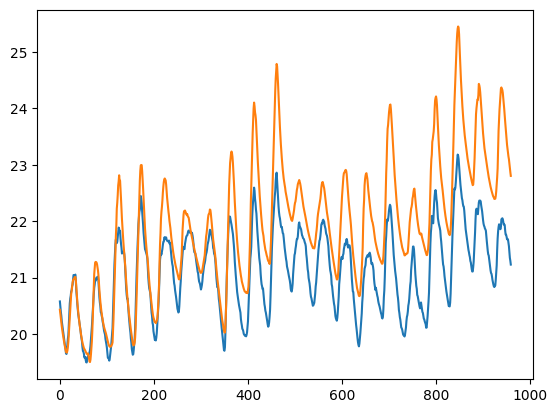

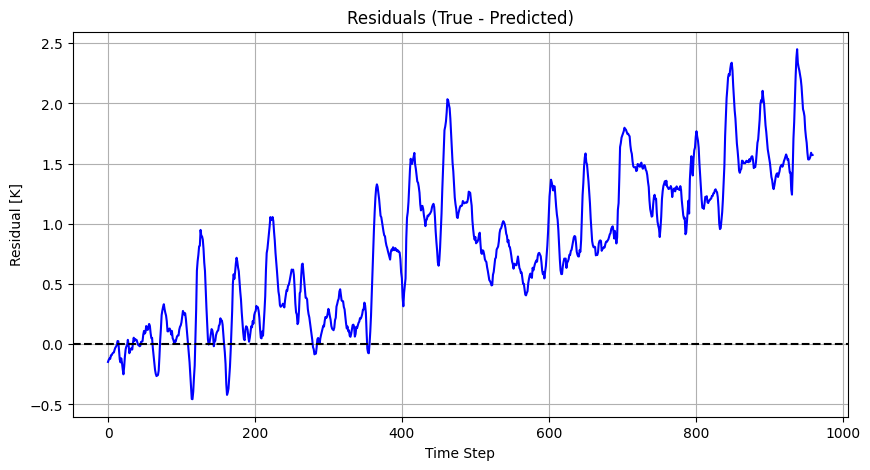

In [9]:
t_single_train_prediction_4R3C=t_true[480:]
t_single_train_actual_4R3C=t_pred[480:]

testing_rmse = np.sqrt(mean_squared_error(t_single_train_actual_4R3C, t_single_train_prediction_4R3C))
print(f"20 days Validation RMSE: {testing_rmse:.4f}")

plt.plot(t_single_train_prediction_4R3C)
plt.plot(t_single_train_actual_4R3C)

# --- Plot Residuals ---
plot_residual(t_pred=t_single_train_prediction_4R3C, t_true=t_single_train_actual_4R3C)